In [96]:
from copy import deepcopy
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']= (16,9)
plt.style.use('ggplot')


In [66]:
#importing daata set
data= pd.read_csv('Data dummy.csv')
print(data.shape)
data.head()

(23, 5)


,Nama Produk,Harga Beli,Harga Jual,Jumlah Stok,Stok Keluar
0,Habbatussauda Extra Propolis Trigon,55000,120000,109,41
1,Habbatussauda Oil 200 Kapsul,45000,100000,99,16
2,Habasyi Oil 100 Kps,24000,48000,85,16
3,Habasyi Oil 210 Kps,45000,90000,81,18
4,Kapsul Habbatus Sauda,10000,24000,81,30


In [67]:
f1= data['Harga Beli'].values/1000
f2= data['Harga Jual'].values/1000
f3= data['Jumlah Stok'].values
f4= data['Stok Keluar'].values
X = np.array(list(zip(f1,f2,f3,f4)))
print(X)

[[ 55. 120. 109.  41.]
 [ 45. 100.  99.  16.]
 [ 24.  48.  85.  16.]
 [ 45.  90.  81.  18.]
 [ 10.  24.  81.  30.]
 [ 15.  35.  83.  49.]
 [ 20.  35. 113.  32.]
 [ 25.  50. 110.  20.]
 [ 30.  60. 106.  38.]
 [ 50. 110.  99.  42.]
 [ 20.  40.  89.  42.]
 [ 60. 125.  92.  50.]
 [ 50. 110.  89.  36.]
 [ 60. 125. 101.  37.]
 [ 45. 100. 102.  47.]
 [ 50. 100.  87.  22.]
 [ 45. 100.  83.  41.]
 [ 40.  90. 107.  43.]
 [ 14.  26.  87.  43.]
 [ 30.  65. 100.  18.]
 [ 40.  85.  92.  42.]
 [ 25.  48. 112.  49.]
 [ 48. 100. 117.  18.]]


In [68]:
#Euclidean Distance
def dist(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [69]:
k=3
C_w = np.random.randint(0, np.max(X)-20, size=k)
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C_z = np.random.randint(0, np.max(X)-20, size=k)
C= np.array(list(zip(C_w,C_x,C_y,C_z)), dtype=np.float32)
C

array([[ 31.,  24.,  13.,  69.],
       [100.,   0.,  95.,  12.],
       [ 30.,  65.,  19.,   0.]], dtype=float32)

In [72]:
C_old=np.zeros((C.shape))
#label
clusters = np.zeros(len(X))
error = dist(C,C_old, None)
counter=1
while counter <100:
    print(counter)
    for i in range(len(X)):
        distance=dist(X[i],C)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    #storing old centroid
    C_old=deepcopy(C)
    #finding the new centroid
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i]=np.mean(points,axis=0)
    error = dist(C,C_old,None)
    counter+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [74]:
print(clusters)
C
error

[2. 2. 0. 2. 0. 0. 1. 1. 1. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 1. 2. 1. 2.]


0.0

In [7]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [42]:
X[:,0]

array([55., 45., 24., 45., 10., 15., 20., 25., 30., 50., 20., 60., 50.,
       60., 45., 50., 45., 40., 14., 30., 40., 25., 48.])

In [83]:
produk = data['Nama Produk']
new_data= np.array(list(zip(produk,clusters)))

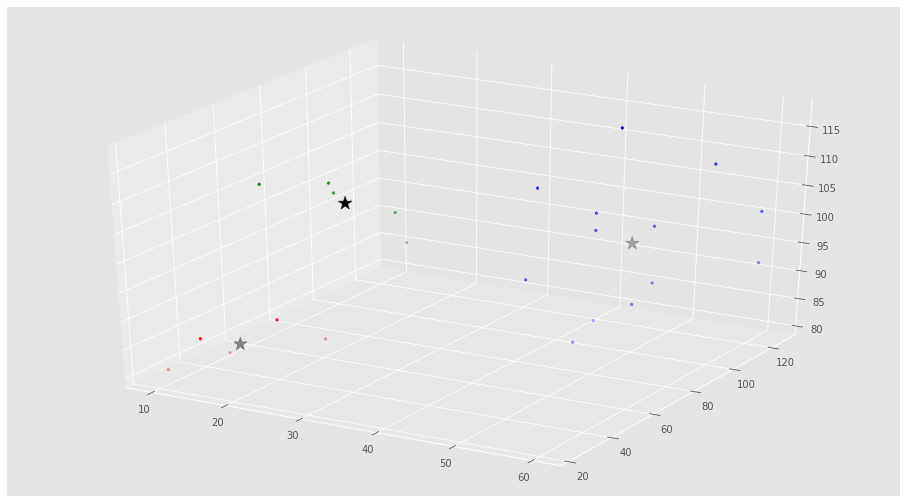

In [97]:
colors= ['r', 'g', 'b', 'y', 'c', 'm']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1],points[:, 2], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1],C[:, 2], marker='*', s=200, c='#050505')